In [18]:
import json
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

df=pd.read_json('transaction-data-adhoc-analysis.json')

newdf1 = df.copy()

newdf1['transaction_date'] = newdf1['transaction_date'].apply(lambda x: str(x)[-5:-3])

newdf1.rename(columns = {'transaction_date':'transaction_month'}, inplace = True)

newdf1.drop(['address', 'birthdate','mail', 'name', 'sex', 'username', 'transaction_value'], axis=1, inplace=True)

orderlisting = newdf1['transaction_items'].str.split(';', expand=True)

for i in orderlisting:
    orderlisting[i]=orderlisting[i].str.split(',')

orderlisting['transaction_month'] = newdf1['transaction_month']

orderlisting.columns = ['Order 1', 'Order 2', 'Order 3','Transaction Month']

orderlisting = orderlisting[['Transaction Month', 'Order 1', 'Order 2', 'Order 3']]

orderlisting["Order 1 Brand"] = orderlisting["Order 1"].str[0]
orderlisting["Order 1 Product"] = orderlisting["Order 1"].str[1]
orderlisting["Order 1 Quantity"] = orderlisting["Order 1"].str[2]

orderlisting["Order 2 Brand"] = orderlisting["Order 2"].str[0]
orderlisting["Order 2 Product"] = orderlisting["Order 2"].str[1]
orderlisting["Order 2 Quantity"] = orderlisting["Order 2"].str[2]

orderlisting["Order 3 Brand"] = orderlisting["Order 3"].str[0]
orderlisting["Order 3 Product"] = orderlisting["Order 3"].str[1]
orderlisting["Order 3 Quantity"] = orderlisting["Order 3"].str[2]

orderlisting.drop(['Order 1', 'Order 2', 'Order 3'], axis=1, inplace=True)
orderlisting.drop(['Order 1 Brand', 'Order 2 Brand', 'Order 3 Brand'], axis=1, inplace=True)

orderlisting = orderlisting.replace([None], [' '], regex=True)

orderlisting['Order 1 Quantity'] = orderlisting['Order 1 Quantity'].apply(lambda x: str(x)[-2:-1])
orderlisting['Order 2 Quantity'] = orderlisting['Order 2 Quantity'].apply(lambda x: str(x)[-2:-1])
orderlisting['Order 3 Quantity'] = orderlisting['Order 3 Quantity'].apply(lambda x: str(x)[-2:-1])

orderlisting['Order 1 Quantity'] = pd.to_numeric(orderlisting['Order 1 Quantity'], errors='coerce')
orderlisting = orderlisting.replace(np.nan, 0, regex=True)
orderlisting['Order 1 Quantity'] = orderlisting['Order 1 Quantity'].astype(int)

orderlisting['Order 2 Quantity'] = pd.to_numeric(orderlisting['Order 2 Quantity'], errors='coerce')
orderlisting = orderlisting.replace(np.nan, 0, regex=True)
orderlisting['Order 2 Quantity'] = orderlisting['Order 2 Quantity'].astype(int)

orderlisting['Order 3 Quantity'] = pd.to_numeric(orderlisting['Order 3 Quantity'], errors='coerce')
orderlisting = orderlisting.replace(np.nan, 0, regex=True)
orderlisting['Order 3 Quantity'] = orderlisting['Order 3 Quantity'].astype(int)

# Number of Beef Chicharons for January
BC1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Beef Chicharon'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Beef Chicharon'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Beef Chicharon'), 'Order 3 Quantity'].sum()])

# Number of Beef Chicharons for February
BC2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Beef Chicharon'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Beef Chicharon'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Beef Chicharon'), 'Order 3 Quantity'].sum()])

# Number of Beef Chicharons for March
BC3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Beef Chicharon'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Beef Chicharon'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Beef Chicharon'), 'Order 3 Quantity'].sum()])

# Number of Beef Chicharons for April
BC4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Beef Chicharon'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Beef Chicharon'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Beef Chicharon'), 'Order 3 Quantity'].sum()])

# Number of Beef Chicharons for May
BC5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Beef Chicharon'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Beef Chicharon'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Beef Chicharon'), 'Order 3 Quantity'].sum()])

# Number of Beef Chicharons for June
BC6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Beef Chicharon'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Beef Chicharon'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Beef Chicharon'), 'Order 3 Quantity'].sum()])

BC_orders = [BC1, BC2, BC3, BC4, BC5, BC6]

# Number of Kimchi and Seaweed for January
KS1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Kimchi and Seaweed'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Kimchi and Seaweed'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Kimchi and Seaweed'), 'Order 3 Quantity'].sum()])

# Number of Kimchi and Seaweed for February
KS2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Kimchi and Seaweed'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Kimchi and Seaweed'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Kimchi and Seaweed'), 'Order 3 Quantity'].sum()])

# Number of Kimchi and Seaweed for March
KS3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Kimchi and Seaweed'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Kimchi and Seaweed'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Kimchi and Seaweed'), 'Order 3 Quantity'].sum()])

# Number of Kimchi and Seaweed for April
KS4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Kimchi and Seaweed'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Kimchi and Seaweed'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Kimchi and Seaweed'), 'Order 3 Quantity'].sum()])

# Number of Kimchi and Seaweed for May
KS5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Kimchi and Seaweed'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Kimchi and Seaweed'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Kimchi and Seaweed'), 'Order 3 Quantity'].sum()])

# Number of Kimchi and Seaweed for June
KS6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Kimchi and Seaweed'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Kimchi and Seaweed'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Kimchi and Seaweed'), 'Order 3 Quantity'].sum()])

KS_orders = [KS1, KS2, KS3, KS4, KS5, KS6]

# Number of Gummy Worms for January
W1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Gummy Worms'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Gummy Worms'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Gummy Worms'), 'Order 3 Quantity'].sum()])

# Number of Gummy Worms for February
W2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Gummy Worms'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Gummy Worms'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Gummy Worms'), 'Order 3 Quantity'].sum()])

# Number of Gummy Worms for March
W3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Gummy Worms'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Gummy Worms'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Gummy Worms'), 'Order 3 Quantity'].sum()])

# Number of Gummy Worms for April
W4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Gummy Worms'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Gummy Worms'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Gummy Worms'), 'Order 3 Quantity'].sum()])

# Number of Gummy Worms for May
W5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Gummy Worms'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Gummy Worms'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Gummy Worms'), 'Order 3 Quantity'].sum()])

# Number of Gummy Worms for June
W6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Gummy Worms'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Gummy Worms'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Gummy Worms'), 'Order 3 Quantity'].sum()])

W_orders = [W1, W2, W3, W4, W5, W6]

# Number of Orange Beans for January
OB1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Orange Beans'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Orange Beans'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Orange Beans'), 'Order 3 Quantity'].sum()])

# Number of Orange Beans for February
OB2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Orange Beans'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Orange Beans'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Orange Beans'), 'Order 3 Quantity'].sum()])

# Number of Orange Beans for March
OB3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Orange Beans'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Orange Beans'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Orange Beans'), 'Order 3 Quantity'].sum()])

# Number of Orange Beans for April
OB4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Orange Beans'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Orange Beans'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Orange Beans'), 'Order 3 Quantity'].sum()])

# Number of Orange Beans for May
OB5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Orange Beans'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Orange Beans'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Orange Beans'), 'Order 3 Quantity'].sum()])

# Number of Orange Beans for June
OB6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Orange Beans'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Orange Beans'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Orange Beans'), 'Order 3 Quantity'].sum()])
            
OB_orders = [OB1, OB2, OB3, OB4, OB5, OB6]           

# Number of Nutrional Milk for January
NM1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Nutrional Milk'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Nutrional Milk'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Nutrional Milk'), 'Order 3 Quantity'].sum()])

# Number of Nutrional Milk for February
NM2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Nutrional Milk'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Nutrional Milk'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Nutrional Milk'), 'Order 3 Quantity'].sum()])

# Number of Nutrional Milk for March
NM3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Nutrional Milk'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Nutrional Milk'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Nutrional Milk'), 'Order 3 Quantity'].sum()])

# Number of Nutrional Milk for April
NM4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Nutrional Milk'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Nutrional Milk'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Nutrional Milk'), 'Order 3 Quantity'].sum()])

# Number of Nutrional Milk for May
NM5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Nutrional Milk'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Nutrional Milk'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Nutrional Milk'), 'Order 3 Quantity'].sum()])

# Number of Nutrional Milk for June
NM6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Nutrional Milk'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Nutrional Milk'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Nutrional Milk'), 'Order 3 Quantity'].sum()])

NM_orders = [NM1, NM2, NM3, NM4, NM5, NM6]

# Number of Yummy Vegetables for January
YVG1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Yummy Vegetables'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Yummy Vegetables'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Yummy Vegetables'), 'Order 3 Quantity'].sum()])

# Number of Yummy Vegetables for February
YVG2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Yummy Vegetables'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Yummy Vegetables'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Yummy Vegetables'), 'Order 3 Quantity'].sum()])

# Number of Yummy Vegetables for March
YVG3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Yummy Vegetables'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Yummy Vegetables'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Yummy Vegetables'), 'Order 3 Quantity'].sum()])

# Number of Yummy Vegetables for April
YVG4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Yummy Vegetables'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Yummy Vegetables'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Yummy Vegetables'), 'Order 3 Quantity'].sum()])

# Number of Yummy Vegetables for May
YVG5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Yummy Vegetables'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Yummy Vegetables'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Yummy Vegetables'), 'Order 3 Quantity'].sum()])

# Number of Yummy Vegetables for June
YVG6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Yummy Vegetables'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Yummy Vegetables'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Yummy Vegetables'), 'Order 3 Quantity'].sum()])
             
YVG_orders = [YVG1, YVG2, YVG3, YVG4, YVG5, YVG6] 

# Number of Gummy Vitamins for January
V1 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 1 Product'] == 'Gummy Vitamins'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 2 Product'] == 'Gummy Vitamins'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '01') & (orderlisting['Order 3 Product'] == 'Gummy Vitamins'), 'Order 3 Quantity'].sum()])

# Number of Gummy Vitamins for February
V2 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 1 Product'] == 'Gummy Vitamins'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 2 Product'] == 'Gummy Vitamins'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '02') & (orderlisting['Order 3 Product'] == 'Gummy Vitamins'), 'Order 3 Quantity'].sum()])

# Number of Gummy Vitamins for March
V3 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 1 Product'] == 'Gummy Vitamins'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 2 Product'] == 'Gummy Vitamins'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '03') & (orderlisting['Order 3 Product'] == 'Gummy Vitamins'), 'Order 3 Quantity'].sum()])

# Number of Gummy Vitamins for April
V4 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 1 Product'] == 'Gummy Vitamins'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 2 Product'] == 'Gummy Vitamins'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '04') & (orderlisting['Order 3 Product'] == 'Gummy Vitamins'), 'Order 3 Quantity'].sum()])

# Number of Gummy Vitamins for May
V5 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 1 Product'] == 'Gummy Vitamins'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 2 Product'] == 'Gummy Vitamins'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '05') & (orderlisting['Order 3 Product'] == 'Gummy Vitamins'), 'Order 3 Quantity'].sum()])

# Number of Gummy Vitamins for June
V6 = np.sum([orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 1 Product'] == 'Gummy Vitamins'), 'Order 1 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 2 Product'] == 'Gummy Vitamins'), 'Order 2 Quantity'].sum(), orderlisting.loc[(orderlisting['Transaction Month'] == '06') & (orderlisting['Order 3 Product'] == 'Gummy Vitamins'), 'Order 3 Quantity'].sum()])

V_orders = [V1, V2, V3, V4, V5, V6]    

orders_array = np.array([BC_orders, KS_orders, W_orders, OB_orders, NM_orders, YVG_orders, V_orders])

orders_index_values = ['Beef Chicharon', 'Kimchi and Seaweed', 'Gummy Worms', 'Orange Beans', 'Nutrional Milk', 'Yummy Vegetables', 'Gummy Vitamins']

orders_column_values = ['January', 'February', 'March', 'April', 'May', 'June']

count_of_orders_per_month = pd.DataFrame(data = orders_array, index = orders_index_values, columns = orders_column_values)

count_of_orders_per_month

,January,February,March,April,May,June
Beef Chicharon,9665,10001,9816,9890,10028,9902
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Gummy Worms,9559,9996,9986,10043,9801,9934
Orange Beans,9774,10037,9611,9914,9964,10106
Nutrional Milk,9727,9691,9876,9786,9881,9767
Yummy Vegetables,9959,10256,9896,9861,9735,9722
Gummy Vitamins,9681,9980,10145,9842,9948,9980


In [19]:
valuelisting = orderlisting.copy()

valuelisting['transaction_value'] = df['transaction_value']

valuelisting.columns = ['Transaction Month', 'Order 1', 'Order 1 Quantity', 'Order 2', 'Order 2 Quantity', 'Order 3', 'Order 3 Quantity','Transaction Value']

# Unit Price of Beef Chicharon
BC_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Beef Chicharon') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

# Unit Price of Kimchi and Seaweed
KS_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Kimchi and Seaweed') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

# Unit Price of Gummy Worms
W_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Gummy Worms') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

# Unit Price of Orange Beans
OB_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Orange Beans') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

# Unit Price of Nutrional Milk
NM_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Nutrional Milk') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

# Unit Price of Yummy Vegetables
YVG_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Yummy Vegetables') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

# Unit Price of Gummy Vitamins
V_price = int(valuelisting.loc[(valuelisting['Order 1'] == 'Gummy Vitamins') & (valuelisting['Order 1 Quantity'] == 1) & (valuelisting['Order 2'] == ' ') & (valuelisting['Order 3'] == ' '), ['Transaction Value']].values[0])

prices_array = np.array([BC_price, KS_price, W_price, OB_price, NM_price, YVG_price, V_price])

price_index_values = ['Beef Chicharon', 'Kimchi and Seaweed', 'Gummy Worms', 'Orange Beans', 'Nutrional Milk', 'Yummy Vegetables', 'Gummy Vitamins']
price_column_values = ['Unit Price']
unit_price_df = pd.DataFrame(data = prices_array, index = price_index_values, columns = price_column_values)

unit_price_df
                        

,Unit Price
Beef Chicharon,1299
Kimchi and Seaweed,799
Gummy Worms,150
Orange Beans,199
Nutrional Milk,1990
Yummy Vegetables,500
Gummy Vitamins,1500


In [20]:
arr1 = np.array(count_of_orders_per_month)

arr2= np.array(unit_price_df)

total_sales_array = np.transpose(arr2*arr1)

sales_column_values = ['Beef Chicharon', 'Kimchi and Seaweed', 'Gummy Worms', 'Orange Beans', 'Nutrional Milk', 'Yummy Vegetables', 'Gummy Vitamins']

sales_index_values = ['January (Sales)', 'February (Sales)', 'March (Sales)', 'April (Sales)', 'May (Sales)', 'June (Sales)']

total_sales_values_df = pd.DataFrame(data = total_sales_array, index = sales_index_values, columns = sales_column_values)

total_sales_values_df = total_sales_values_df.T

total_sales_values_df

,January (Sales),February (Sales),March (Sales),April (Sales),May (Sales),June (Sales)
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000


In [21]:
customers_df = df.copy()

customers_df['transaction_date'] = customers_df['transaction_date'].apply(lambda x: str(x)[-5:-3])

customers_df.rename(columns = {'transaction_date':'transaction_month'}, inplace = True)

customers_df.drop(['address', 'birthdate','mail', 'sex', 'username', 'transaction_items', 'transaction_value'], axis=1, inplace=True)

customers_df.columns = ['Name','Transaction Month']

sorted_customers_df = customers_df.sort_values(['Name', 'Transaction Month'], ascending=[True, True]).drop_duplicates()

updated_customers_df = sorted_customers_df.set_index(['Name', sorted_customers_df.groupby('Name').cumcount()]).unstack().add_prefix('Month_').droplevel(0, 1).reset_index()

updated_customers_df.columns = ['Name', 'Month 1', 'Month 2','Month 3', 'Month 4', 'Month 5', 'Month 6']

def condition1(i):
    if (i['Month 1'] == '01') or (i['Month 2'] == '01') or (i['Month 3'] == '01') or (i['Month 4'] == '01') or (i['Month 5'] == '01') or (i['Month 6'] == '01'): 
        return True
    else:
        return False

def condition2(i):
    if (i['Month 1'] == '02') or (i['Month 2'] == '02') or (i['Month 3'] == '02') or (i['Month 4'] == '02') or (i['Month 5'] == '02') or (i['Month 6'] == '02'): 
        return True
    else:
        return False
    
def condition3(i):
    if (i['Month 1'] == '03') or (i['Month 2'] == '03') or (i['Month 3'] == '03') or (i['Month 4'] == '03') or (i['Month 5'] == '03') or (i['Month 6'] == '03'): 
        return True
    else:
        return False
    
def condition4(i):
    if (i['Month 1'] == '04') or (i['Month 2'] == '04') or (i['Month 3'] == '04') or (i['Month 4'] == '04') or (i['Month 5'] == '04') or (i['Month 6'] == '04'): 
        return True
    else:
        return False

def condition5(i):
    if (i['Month 1'] == '05') or (i['Month 2'] == '05') or (i['Month 3'] == '05') or (i['Month 4'] == '05') or (i['Month 5'] == '05') or (i['Month 6'] == '05'): 
        return True
    else:
        return False

def condition6(i):
    if (i['Month 1'] == '06') or (i['Month 2'] == '06') or (i['Month 3'] == '06') or (i['Month 4'] == '06') or (i['Month 5'] == '06') or (i['Month 6'] == '06'): 
        return True
    else:
        return False
    
updated_customers_df['January'] = updated_customers_df.apply(condition1, axis=1)
updated_customers_df['February'] = updated_customers_df.apply(condition2, axis=1)
updated_customers_df['March'] = updated_customers_df.apply(condition3, axis=1)
updated_customers_df['April'] = updated_customers_df.apply(condition4, axis=1)
updated_customers_df['May'] = updated_customers_df.apply(condition5, axis=1)
updated_customers_df['June'] = updated_customers_df.apply(condition6, axis=1)

updated_customers_df.drop(['Month 1', 'Month 2','Month 3', 'Month 4', 'Month 5', 'Month 6'], axis=1, inplace=True)

updated_customers_df

,Name,January,February,March,April,May,June
0,Aaron Beasley,False,False,False,True,True,True
1,Aaron Brewer,True,True,True,True,False,True
2,Aaron Brown,False,False,True,True,True,True
3,Aaron Coffey,True,True,True,True,True,False
4,Aaron Davis,True,True,False,True,True,True
...,...,...,...,...,...,...,...
8482,Zachary Valentine,True,True,True,True,True,True
8483,Zachary Ware,True,True,True,True,True,True
8484,Zachary Williams,True,True,True,True,False,False
8485,Zachary Wilson,False,False,False,True,True,True


In [22]:
# Repeat Customers Count

repeaters_df = updated_customers_df.copy()

repeaters_df['February Repeaters'] = repeaters_df['January'] & repeaters_df['February']
repeaters_df['March Repeaters'] = repeaters_df['February'] & repeaters_df['March']
repeaters_df['April Repeaters'] = repeaters_df['March'] & repeaters_df['April']
repeaters_df['May Repeaters'] = repeaters_df['April'] & repeaters_df['May']
repeaters_df['June Repeaters'] = repeaters_df['May'] & repeaters_df['June']

repeaters_df["February Repeaters"] = repeaters_df["February Repeaters"].astype(int)
repeaters_df["March Repeaters"] = repeaters_df["March Repeaters"].astype(int)
repeaters_df["April Repeaters"] = repeaters_df["April Repeaters"].astype(int)
repeaters_df["May Repeaters"] = repeaters_df["May Repeaters"].astype(int)
repeaters_df["June Repeaters"] = repeaters_df["June Repeaters"].astype(int)

Total_January_Repeaters = 0
Total_February_Repeaters = repeaters_df['February Repeaters'].sum()
Total_March_Repeaters = repeaters_df['March Repeaters'].sum()
Total_April_Repeaters = repeaters_df['April Repeaters'].sum()
Total_May_Repeaters = repeaters_df['May Repeaters'].sum()
Total_June_Repeaters = repeaters_df['June Repeaters'].sum()

repeaters_list = [Total_January_Repeaters, Total_February_Repeaters, Total_March_Repeaters, Total_April_Repeaters, Total_May_Repeaters, Total_June_Repeaters]

# Inactive Customers Count

inactive_df = updated_customers_df.copy()

Total_January_Inactive = 0

February_inactive = inactive_df[inactive_df[['January']].any(axis='columns')]
def inactive_condition1(i):
    if (i['February']) == False: 
        return 1
    else:
        return 0
February_inactive['February Inactive Customers'] = February_inactive.apply(inactive_condition1, axis=1)
Total_February_Inactive = February_inactive['February Inactive Customers'].sum()


March_inactive = inactive_df[inactive_df[['January','February']].any(axis='columns')]
def inactive_condition2(i): 
    if (i['March'] == False): 
        return 1
    else:
        return 0
March_inactive['March Inactive Customers'] = March_inactive.apply(inactive_condition2, axis=1)
Total_March_Inactive = March_inactive['March Inactive Customers'].sum()

April_inactive = inactive_df[inactive_df[['January','February', 'March']].any(axis='columns')]
def inactive_condition3(i): 
    if (i['April'] == False): 
        return 1
    else:
        return 0
April_inactive['April Inactive Customers'] = April_inactive.apply(inactive_condition3, axis=1)
Total_April_Inactive = April_inactive['April Inactive Customers'].sum()

May_inactive = inactive_df[inactive_df[['January','February', 'March', 'April']].any(axis='columns')]
def inactive_condition4(i): 
    if (i['May'] == False): 
        return 1
    else:
        return 0
May_inactive['May Inactive Customers'] = May_inactive.apply(inactive_condition4, axis=1)
Total_May_Inactive = May_inactive['May Inactive Customers'].sum()

June_inactive = inactive_df[inactive_df[['January','February', 'March', 'April', 'May']].any(axis='columns')]
def inactive_condition5(i): 
    if (i['June'] == False): 
        return 1
    else:
        return 0
June_inactive['June Inactive Customers'] = June_inactive.apply(inactive_condition5, axis=1)
Total_June_Inactive = June_inactive['June Inactive Customers'].sum()

inactive_list = [Total_January_Inactive, Total_February_Inactive, Total_March_Inactive, Total_April_Inactive, Total_May_Inactive, Total_June_Inactive]

# Engaged Customers Count

engaged_df = updated_customers_df.copy()

engaged_df['January Engaged Customers'] = engaged_df['January']
engaged_df['February Engaged Customers'] = engaged_df['January'] & engaged_df['February']
engaged_df['March Engaged Customers'] = engaged_df['January'] & engaged_df['February'] & engaged_df['March']
engaged_df['April Engaged Customers'] = engaged_df['January'] & engaged_df['February'] & engaged_df['March'] & engaged_df['April']
engaged_df['May Engaged Customers'] = engaged_df['January'] & engaged_df['February'] & engaged_df['March'] & engaged_df['April'] & engaged_df['May']
engaged_df['June Engaged Customers'] = engaged_df['January'] & engaged_df['February'] & engaged_df['March'] & engaged_df['April'] & engaged_df['May'] & engaged_df['June']

engaged_df['January Engaged Customers'] = engaged_df['January Engaged Customers'].astype(int)
engaged_df['February Engaged Customers'] = engaged_df['February Engaged Customers'].astype(int)
engaged_df['March Engaged Customers'] = engaged_df['March Engaged Customers'].astype(int)
engaged_df['April Engaged Customers'] = engaged_df['April Engaged Customers'].astype(int)
engaged_df['May Engaged Customers'] = engaged_df['May Engaged Customers'].astype(int)
engaged_df['June Engaged Customers'] = engaged_df['June Engaged Customers'].astype(int)

Total_January_Engaged = engaged_df['January Engaged Customers'].sum()
Total_February_Engaged = engaged_df['February Engaged Customers'].sum()
Total_March_Engaged = engaged_df['March Engaged Customers'].sum()
Total_April_Engaged = engaged_df['April Engaged Customers'].sum()
Total_May_Engaged = engaged_df['May Engaged Customers'].sum()
Total_June_Engaged = engaged_df['June Engaged Customers'].sum()

engaged_list = [Total_January_Engaged, Total_February_Engaged, Total_March_Engaged, Total_April_Engaged, Total_May_Engaged, Total_June_Engaged]

# Summary of Metrics Dataframe
metrics_array = np.array([repeaters_list,inactive_list,engaged_list])

metrics_index_values = ['Repeaters', 'Inactive', 'Engaged']

metrics_column_values = ['January', 'February', 'March', 'April', 'May', 'June']

metrics_summary_df = pd.DataFrame(data = metrics_array, index = metrics_index_values, columns = metrics_column_values)

metrics_summary_df

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


In [23]:
# Line Graphs for the Unit Sales of Each Product

In [24]:
import matplotlib.pyplot as plt

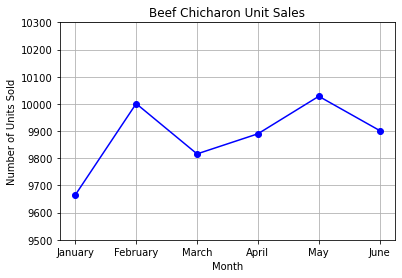

In [25]:
# Beef Chicharon
BC_graph = plt.plot(orders_column_values, BC_orders, color = 'b', marker = 'o')
plt.title('Beef Chicharon Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

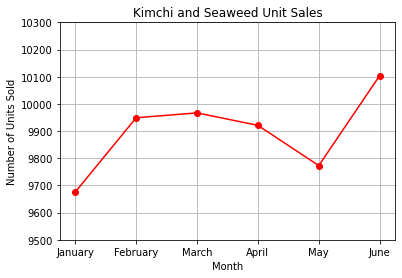

In [26]:
# Kimchi and Seaweed
KS_graph = plt.plot(orders_column_values, KS_orders, color = 'r', marker = 'o')
plt.title('Kimchi and Seaweed Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

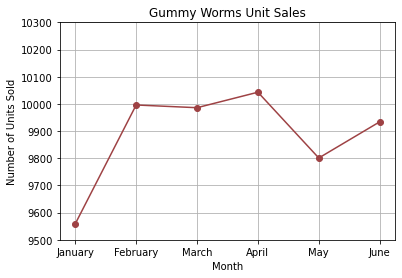

In [27]:
# Gummy Worms
W_graph = plt.plot(orders_column_values, W_orders, color = '#9E4244', marker = 'o')
plt.title('Gummy Worms Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

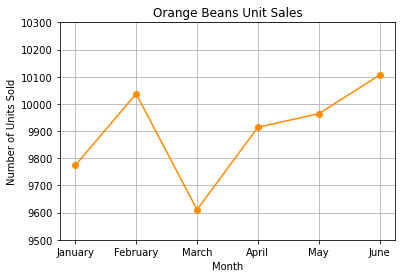

In [28]:
# Orange Beans
OB_graph = plt.plot(orders_column_values, OB_orders, color = '#FF8C00', marker = 'o')
plt.title('Orange Beans Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

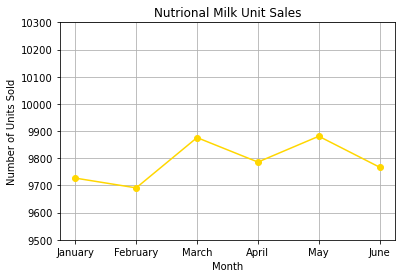

In [29]:
# Nutrional Milk
NM_graph = plt.plot(orders_column_values, NM_orders, color = '#FFD700', marker = 'o')
plt.title('Nutrional Milk Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

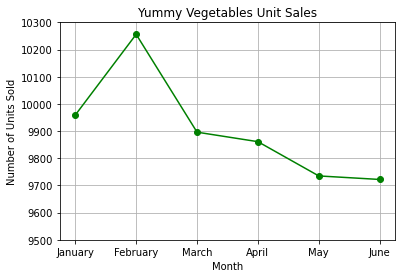

In [30]:
# Yummy Vegetables
YVG_graph = plt.plot(orders_column_values, YVG_orders, color = 'g', marker = 'o')
plt.title('Yummy Vegetables Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

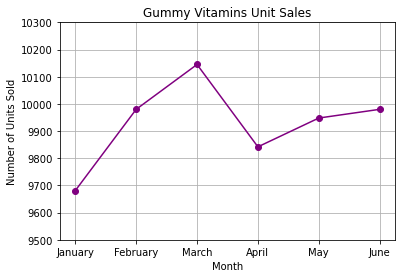

In [31]:
# Gummy Vitamins
V_graph = plt.plot(orders_column_values, V_orders, color = '#800080', marker = 'o')
plt.title('Gummy Vitamins Unit Sales')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.yticks( range(9500,10_400,100) )
plt.grid(True)
plt.tight_layout
plt.show()

In [32]:
# Bar Graphs for the Number of Transactions made in Each State for Each Month

In [33]:
address_df = df.copy()

address_df['transaction_date'] = address_df['transaction_date'].apply(lambda x: str(x)[-5:-3])

address_df.rename(columns = {'transaction_date':'Transaction Month'}, inplace = True)

address_df['address'] = address_df['address'].apply(lambda x: str(x)[-9:-6])

address_df.rename(columns = {'address':'State Abbreviation'}, inplace = True)

address_df.drop(['birthdate','mail', 'name', 'sex', 'username', 'transaction_items', 'transaction_value'], axis=1, inplace=True)

combination_count = address_df.value_counts().reset_index(name= 'Transactions').sort_index(ascending=False).sort_values(['State Abbreviation', 'Transaction Month'], ascending=[True, True])

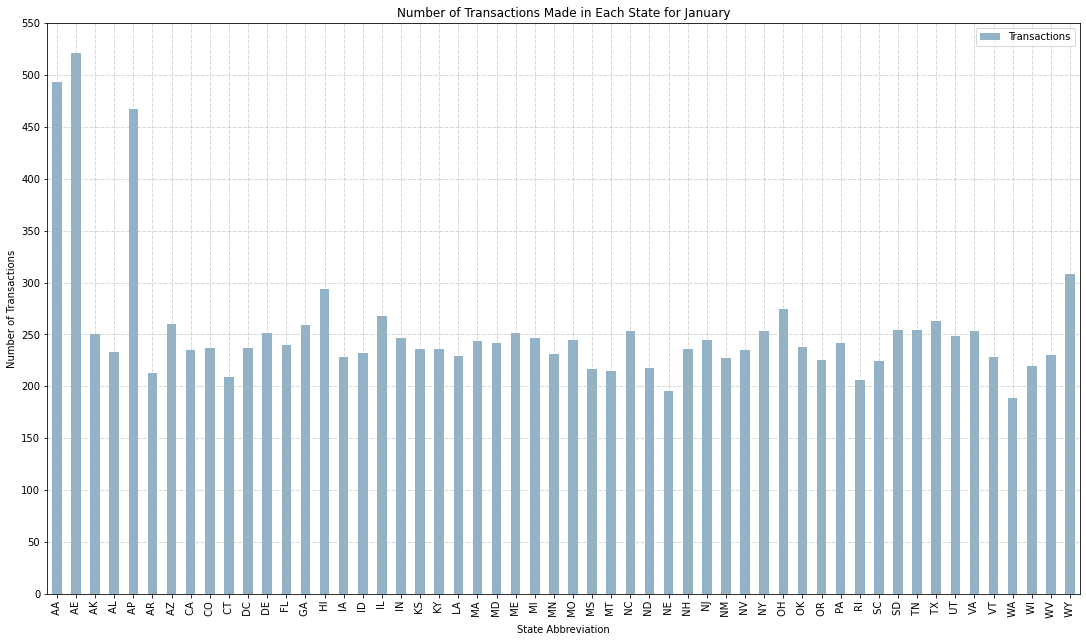

In [34]:
# Number of Transactions Made in Each State For January

january = combination_count["Transaction Month"] == '01'
january_orders = combination_count[january]

january_orders.plot('State Abbreviation', 'Transactions', kind='bar', color = '#91B2C7')
plt.title('Number of Transactions Made in Each State for January')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Transactions')
plt.yticks( range(0,600,50) )
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

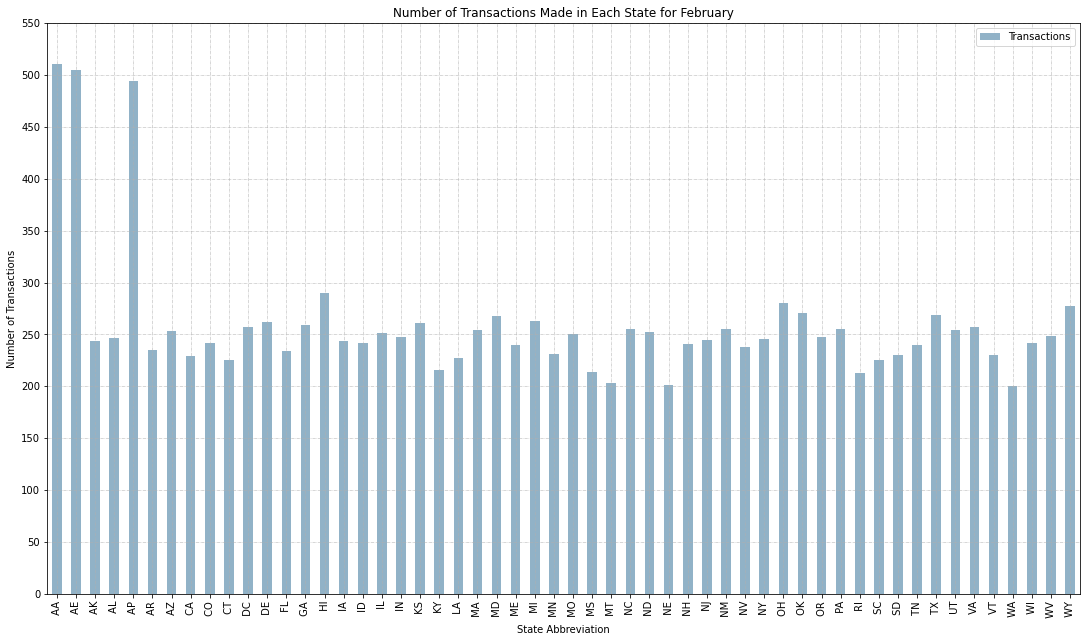

In [35]:
# Number of Transactions Made in Each State For February

february = combination_count["Transaction Month"] == '02'
february_orders = combination_count[february]

february_orders.plot('State Abbreviation', 'Transactions', kind='bar', color = '#91B2C7')
plt.title('Number of Transactions Made in Each State for February')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Transactions')
plt.yticks( range(0,600,50) )
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

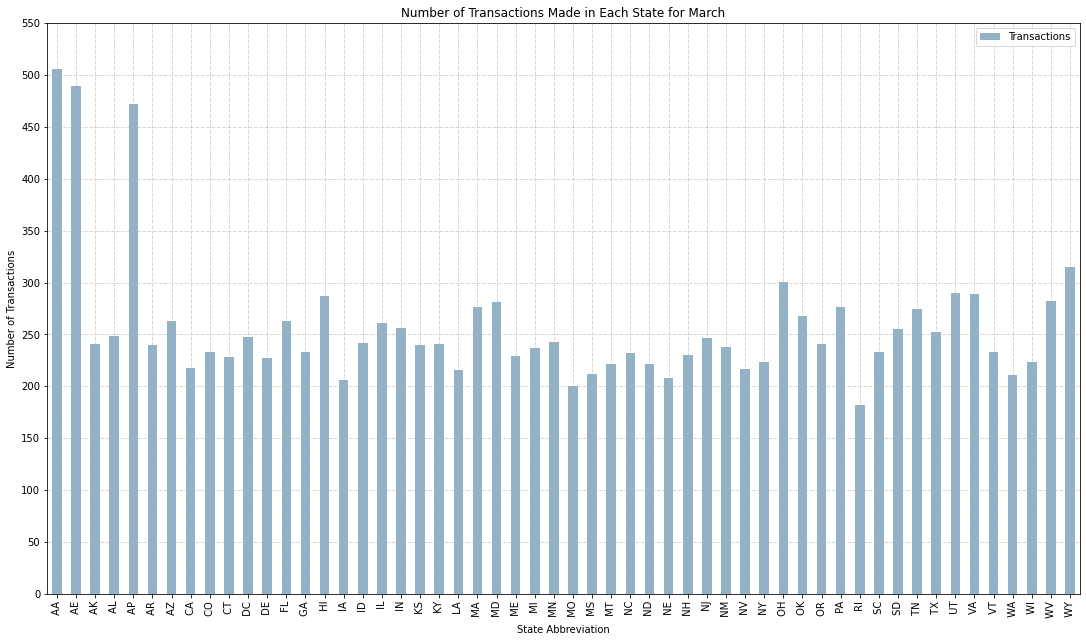

In [36]:
# Number of Transactions Made in Each State For March

march = combination_count["Transaction Month"] == '03'
march_orders = combination_count[march]

march_orders.plot('State Abbreviation', 'Transactions', kind='bar', color = '#91B2C7')
plt.title('Number of Transactions Made in Each State for March')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Transactions')
plt.yticks( range(0,600,50) )
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

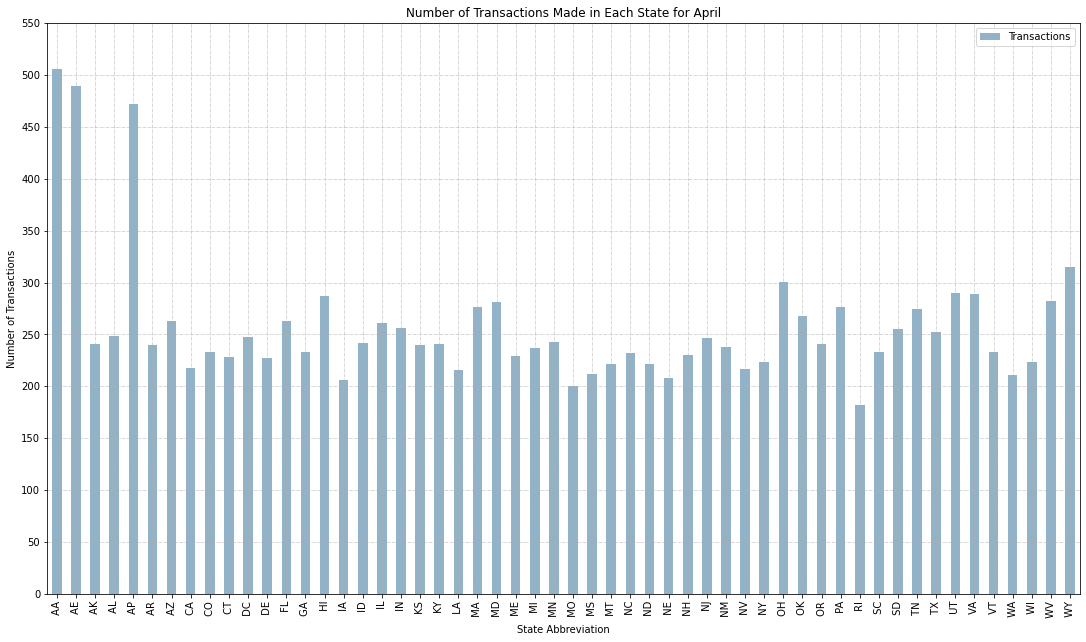

In [37]:
# Number of Transactions Made in Each State For April

april = combination_count["Transaction Month"] == '04'
april_orders = combination_count[march]

april_orders.plot('State Abbreviation', 'Transactions', kind='bar', color = '#91B2C7')
plt.title('Number of Transactions Made in Each State for April')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Transactions')
plt.yticks( range(0,600,50) )
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

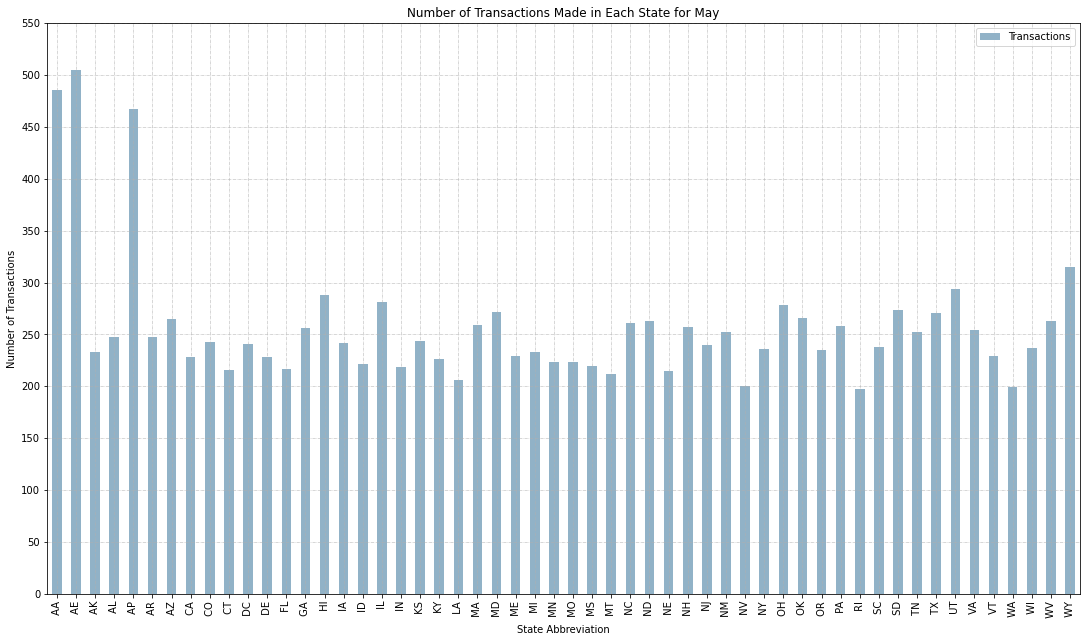

In [38]:
# Number of Transactions Made in Each State For May

may = combination_count["Transaction Month"] == '05'
may_orders = combination_count[may]

may_orders.plot('State Abbreviation', 'Transactions', kind='bar', color = '#91B2C7')
plt.title('Number of Transactions Made in Each State for May')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Transactions')
plt.yticks( range(0,600,50) )
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

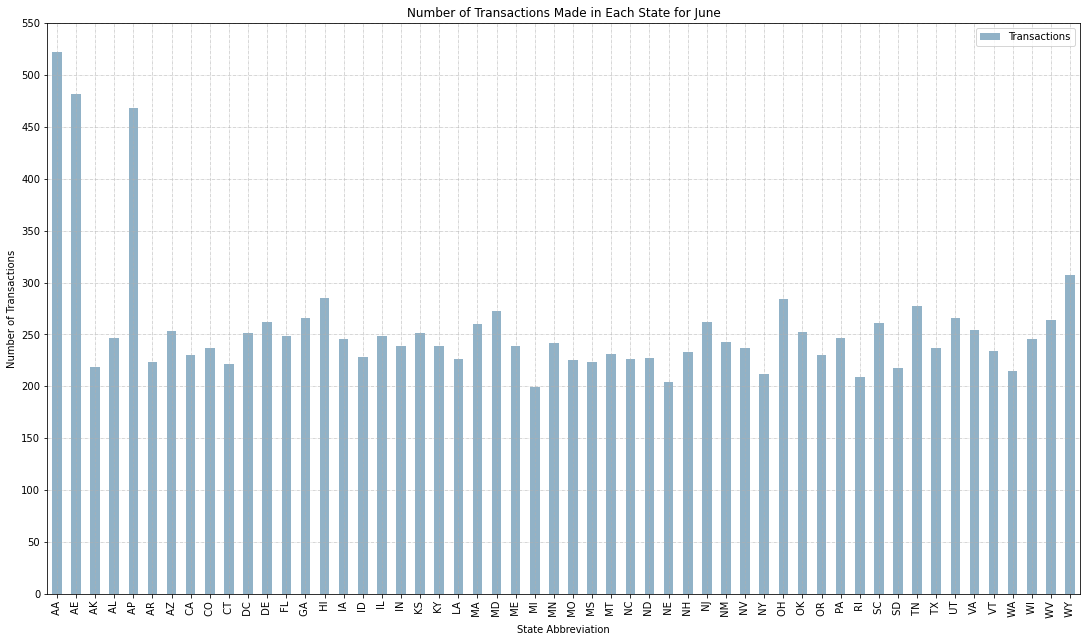

In [39]:
# Number of Transactions Made in Each State For June

june = combination_count["Transaction Month"] == '06'
june_orders = combination_count[june]

june_orders.plot('State Abbreviation', 'Transactions', kind='bar', color = '#91B2C7')
plt.title('Number of Transactions Made in Each State for June')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Transactions')
plt.yticks( range(0,600,50) )
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()